In [238]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [239]:
data = pd.read_csv(r"C:\Users\abhij\OneDrive\Documents\DCU\Practicum\PracticumDatasetNew.csv")

In [240]:
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/5/2014,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6544 non-null   int64  
 1   title                 6544 non-null   object 
 2   vote_average          6544 non-null   float64
 3   vote_count            6544 non-null   int64  
 4   status                6544 non-null   object 
 5   release_date          6544 non-null   object 
 6   revenue               6544 non-null   int64  
 7   runtime               6544 non-null   int64  
 8   adult                 6544 non-null   bool   
 9   backdrop_path         5580 non-null   object 
 10  budget                6544 non-null   int64  
 11  homepage              2998 non-null   object 
 12  imdb_id               5651 non-null   object 
 13  original_language     6544 non-null   object 
 14  original_title        6544 non-null   object 
 15  overview             

In [242]:
data.isna()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6539,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
6540,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,True,False,True
6541,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
6542,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [243]:
len(data)

6544

In [244]:
data.isna().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date               0
revenue                    0
runtime                    0
adult                      0
backdrop_path            964
budget                     0
homepage                3546
imdb_id                  893
original_language          0
original_title             0
overview                 284
popularity                 0
poster_path              224
tagline                 1954
genres                     0
production_companies     588
production_countries     146
spoken_languages         253
keywords                1240
dtype: int64

In [245]:
data.drop("backdrop_path", axis=1, inplace=True)
data.drop("homepage", axis = 1, inplace = True)
data.drop("poster_path", axis = 1, inplace = True)
data.drop("adult", axis = 1, inplace = True)
data.drop("imdb_id", axis = 1, inplace = True)
data.drop("original_title", axis = 1, inplace = True)
data.drop("tagline", axis = 1, inplace = True)

In [246]:
data.isna().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date               0
revenue                    0
runtime                    0
budget                     0
original_language          0
overview                 284
popularity                 0
genres                     0
production_companies     588
production_countries     146
spoken_languages         253
keywords                1240
dtype: int64

In [247]:
data['original_language'].unique()

array(['en', 'ko', 'fr', 'es', 'ja', 'da', 'de', 'cn', 'id', 'it', 'sv',
       'hi', 'pt', 'el', 'fa', 'ar', 'zh', 'nb', 'pl', 'fi', 'tr', 'no',
       'te', 'la', 'nl', 'hu', 'he', 'ru', 'th', 'ro', 'gl', 'tn', 'uk',
       'et', 'ta', 'ml', 'vi', 'cs', 'kn', 'ca', 'ku', 'tl', 'ms', 'hr',
       'mr', 'bn', 'sr', 'bm', 'ur', 'pa', 'sk', 'lt', 'km', 'gu', 'ne',
       'lv', 'ka', 'si', 'mn', 'bg', 'sq', 'xx', 'sw', 'am', 'dv', 'uz',
       'ht', 'lg', 'bs', 'jv'], dtype=object)

In [248]:
columns = list[data.columns]
columns

list[Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'original_language', 'overview',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords'],
      dtype='object')]

In [249]:
data['original_language']

0       en
1       en
2       en
3       en
4       en
        ..
6539    en
6540    en
6541    te
6542    bn
6543    en
Name: original_language, Length: 6544, dtype: object

In [250]:
correlation_matrix = data[['vote_average', 'vote_count', 'revenue', 'popularity']].corr()
correlation_matrix

,vote_average,vote_count,revenue,popularity
vote_average,1.000000,0.218411,0.136741,0.093236
vote_count,0.218411,1.000000,0.742048,0.171057
revenue,0.136741,0.742048,1.000000,0.206465
popularity,0.093236,0.171057,0.206465,1.000000


In [251]:
data.isnull().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date               0
revenue                    0
runtime                    0
budget                     0
original_language          0
overview                 284
popularity                 0
genres                     0
production_companies     588
production_countries     146
spoken_languages         253
keywords                1240
dtype: int64

In [252]:
print(data[data['production_companies'].isnull()])

          id                    title  vote_average  vote_count    status  \
2803    9893                Sleepover         5.997         443  Released   
3345   10790            The Abandoned         5.470         218  Released   
3388  383807          Heal the Living         6.425         200  Released   
3507   12621                 Hamlet 2         5.909         164  Released   
3697   11345               The Zodiac         5.466         119  Released   
...      ...                      ...           ...         ...       ...   
6531  687789                  Clouded         0.000           0  Released   
6532  687315    Jeko and Pepi wedding         0.000           0  Released   
6539  682540  How I Killed My Brother         0.000           0  Released   
6540  683433                Yesterday         0.000           0  Released   
6543  684767                    Skelf         0.000           0  Released   

     release_date   revenue  runtime    budget original_language  \
2803   

In [253]:
data['production_companies'] = data['production_companies'].fillna('Other')
data['spoken_languages'] = data['spoken_languages'].fillna('Other')
data['keywords'] = data['keywords'].fillna('No Keywords')
data['overview'] = data['overview'].fillna('No Overview')
data['production_countries'] = data['production_countries'].fillna('Other')

In [254]:
data.isna().sum()

id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
budget                  0
original_language       0
overview                0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
keywords                0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [255]:
print("Number of rows =",len(data.columns))
print("Number of columns =",len(data))

Number of rows = 17
Number of columns = 6544


In [256]:
data.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,6.544000e+03,6544.000000,6544.000000,6.544000e+03,6544.000000,6.544000e+03,6544.000000
mean,3.605378e+05,5.767256,1477.685972,6.444218e+07,95.865526,2.297539e+07,18.104723
std,3.644767e+05,2.471115,3062.031177,1.732356e+08,45.673950,4.349229e+07,73.615204
min,2.500000e+01,0.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,4.080650e+04,5.448000,5.000000,1.000000e+05,89.000000,3.000000e+05,1.400000
50%,2.681185e+05,6.304000,237.000000,6.161924e+06,102.000000,6.093658e+06,10.187500
75%,5.634892e+05,7.014000,1486.750000,4.901473e+07,120.000000,2.500000e+07,19.099750
max,1.288906e+06,10.000000,34495.000000,3.000000e+09,990.000000,8.000000e+08,2994.357000


In [257]:
data['vote_avg_count'] = data['vote_average'] * data['vote_count']
data['budget_popularity_interaction'] = data['budget'] * data['popularity']
data['log_budget'] = np.log1p(data['budget'])
data['popularity_bin'] = pd.cut(data['popularity'], bins=5, labels=False)

In [258]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#There is moderate collinearity but not enough to warrant corrective measures.

data_vif_check = data[['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'budget_popularity_interaction']]

def calculate_vif(data_vif_check):
    data_with_constant = sm.add_constant(data_vif_check)
    
    vif = pd.DataFrame()
    vif["Variable"] = data_with_constant.columns
    vif["VIF"] = [variance_inflation_factor(data_with_constant.values, i) for i in range(data_with_constant.shape[1])]
    
    vif = vif.drop(vif[vif['Variable'] == 'const'].index)
    
    return vif

vif_df = calculate_vif(data_vif_check)
print(vif_df)


                        Variable       VIF
1                   vote_average  1.166204
2                     vote_count  1.740155
3                         budget  1.967582
4                        runtime  1.197346
5                     popularity  2.413445
6  budget_popularity_interaction  2.679548


In [259]:
len(data[data['budget'] == 0])

0

In [260]:
data['roi'] = (data['revenue'] - data['budget']) / data['budget']
data['Success'] = (data['roi']>1).astype(int)

In [261]:
print(data['Success'].value_counts())

Success
0    3888
1    2656
Name: count, dtype: int64


RANDOM FOREST WITHOUT FEATURE ENGINEERING

In [262]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import randint, uniform

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language', 'genres']
X = data[features]
y = data['Success']

# Define numeric and categorical features
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity']
categorical_features = ['original_language']
mlb_features = ['genres']

# Apply MultiLabelBinarizer outside the pipeline
mlb = MultiLabelBinarizer()
genres_transformed = mlb.fit_transform(data['genres'])
genres_df = pd.DataFrame(genres_transformed, index=data.index, columns=mlb.classes_)

# Combine the transformed genres with the original data
X = X.drop(columns='genres').join(genres_df)

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)])

# Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(1, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__max_features': ['sqrt', 'log2', None]  # Corrected values for max_features
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model from random search
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_proba_rf = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')

conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Print evaluation metrics
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC: {roc_auc}')

Best Parameters: {'classifier__max_depth': 17, 'classifier__max_features': None, 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 471}
Accuracy: 0.7486631016042781
F1 Score: 0.6706706706706707
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       755
           1       0.75      0.60      0.67       554

    accuracy                           0.75      1309
   macro avg       0.75      0.73      0.73      1309
weighted avg       0.75      0.75      0.74      1309

Confusion Matrix:
[[645 110]
 [219 335]]
ROC-AUC: 0.7976534296028881


RANDOM FOREST WITH FEATURE ENGINEERING

In [263]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'original_language', 'overview',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords', 'vote_avg_count',
       'budget_popularity_interaction', 'log_budget', 'popularity_bin', 'roi',
       'Success'],
      dtype='object')

In [264]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import randint, uniform

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language', 'genres', 'budget_popularity_interaction', 'log_budget']
X = data[features]
y = data['Success']

# Define numeric and categorical features
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'log_budget', 'budget_popularity_interaction']
categorical_features = ['original_language']
mlb_features = ['genres']

# Apply MultiLabelBinarizer outside the pipeline
mlb = MultiLabelBinarizer()
genres_transformed = mlb.fit_transform(data['genres'])
genres_df = pd.DataFrame(genres_transformed, index=data.index, columns=mlb.classes_)

# Combine the transformed genres with the original data
X = X.drop(columns='genres').join(genres_df)

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)])

# Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(1, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__max_features': ['sqrt', 'log2', None]  # Corrected values for max_features
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model from random search
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_proba_rf = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')

conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Print evaluation metrics
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC: {roc_auc}')


Best Parameters: {'classifier__max_depth': 17, 'classifier__max_features': None, 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 471}
Accuracy: 0.7433155080213903
F1 Score: 0.6619718309859155
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       755
           1       0.75      0.59      0.66       554

    accuracy                           0.74      1309
   macro avg       0.74      0.72      0.73      1309
weighted avg       0.74      0.74      0.74      1309

Confusion Matrix:
[[644 111]
 [225 329]]
ROC-AUC: 0.7981782102469697


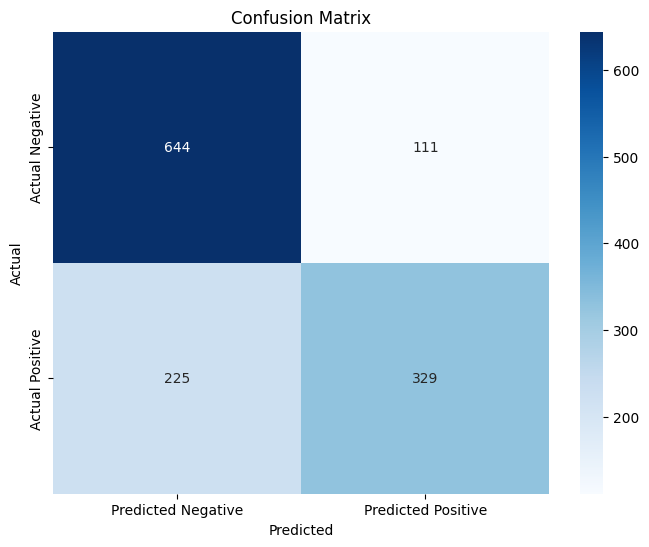

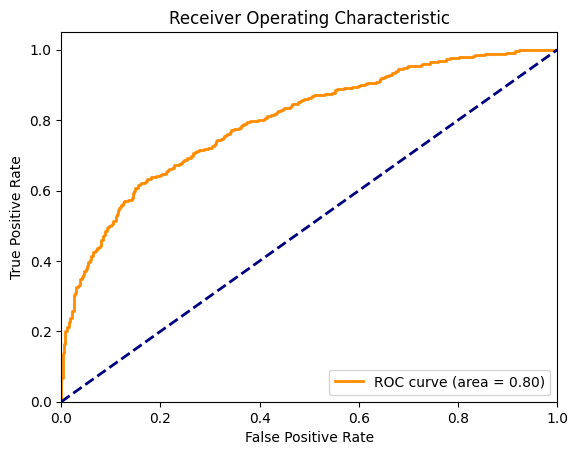

In [265]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

SVC WITHOUT FEATURE ENGINEERING

In [266]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import loguniform 

# Custom transformer for genres
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language']
X = data[features + ['genres']]
y = data['Success']

# Preprocessing for numeric and categorical data
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity']
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('genres', Pipeline([('mlb', MultiLabelBinarizerTransformer())]), 'genres')
    ])

# Create a pipeline that includes preprocessing, feature selection, and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=20)),  # Reduce the number of features
    ('classifier', SVC(random_state=42, probability=True, kernel='linear'))  # Use linear kernel
])

# Define hyperparameters for RandomizedSearchCV with stronger regularization
param_distributions = {
    'classifier__C': loguniform(0.001, 1)  # Further increase regularization
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV with StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)
search.fit(X_train, y_train)

# Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test,y_pred)


print(f'Best parameters: {search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1}')
print(f'Classification Report:\n{report}')

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC: {roc_auc}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__C': 0.5345166110646817}
Accuracy: 0.7028265851795263
F1 score: 0.538552787663108
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       755
           1       0.79      0.41      0.54       554

    accuracy                           0.70      1309
   macro avg       0.73      0.66      0.66      1309
weighted avg       0.72      0.70      0.68      1309

Confusion Matrix:
[[644 111]
 [225 329]]
ROC-AUC: 0.7981782102469697


SVC WITH FEATURE ENGINEERING

In [289]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import loguniform 

# Custom transformer for genres
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language', 'log_budget', 'budget_popularity_interaction']
X = data[features + ['genres']]
y = data['Success']

# Preprocessing for numeric and categorical data
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'budget_popularity_interaction', 'log_budget']
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('genres', Pipeline([('mlb', MultiLabelBinarizerTransformer())]), 'genres')
    ])

# Create a pipeline that includes preprocessing, feature selection, and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=20)),  # Reduce the number of features
    ('classifier', SVC(random_state=42, probability=True, kernel='linear'))  # Use linear kernel
])

# Define hyperparameters for RandomizedSearchCV with stronger regularization
param_distributions = {
    'classifier__C': loguniform(0.001, 1)  # Further increase regularization
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV with StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)
search.fit(X_train, y_train)

# Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best parameters: {search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC: {roc_auc}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__C': 0.711447600934342}
Accuracy: 0.6944232238349886
F1 score: 0.504950495049505
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       755
           1       0.80      0.37      0.50       554

    accuracy                           0.69      1309
   macro avg       0.74      0.65      0.64      1309
weighted avg       0.73      0.69      0.66      1309

Confusion Matrix:
[[643 112]
 [251 303]]
ROC-AUC: 0.7845506491022545


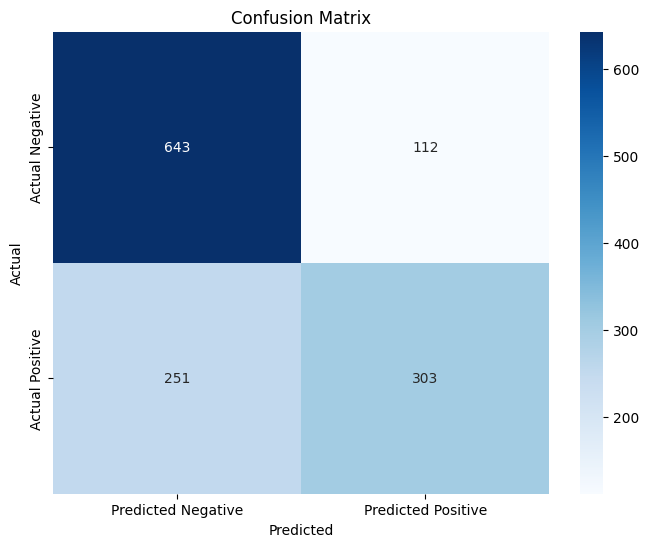

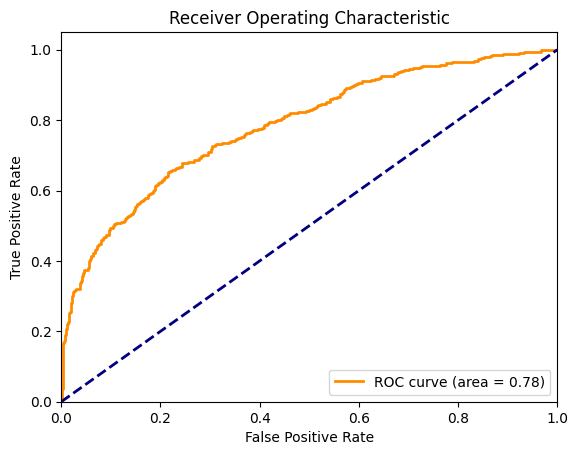

In [288]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


KNN WITHOUT FEATURE ENGINEERING

In [270]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import randint, uniform

# Custom transformer for genres
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language']
X = data[features + ['genres']]
y = data['Success']

# Preprocessing for numeric and categorical data
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity']
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('genres', Pipeline([('mlb', MultiLabelBinarizerTransformer())]), 'genres')
    ])

# Create a pipeline that includes preprocessing, feature selection, and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=20)),  # Reduce the number of features
    ('classifier', KNeighborsClassifier())  # KNN classifier
])

# Define hyperparameters for RandomizedSearchCV
param_distributions = {
    'classifier__n_neighbors': randint(1, 30),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV with StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)
search.fit(X_train, y_train)

# Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba_knn = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

print(f'Best parameters: {search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'roc_auc: {roc_auc}')



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__n_neighbors': 26, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Accuracy: 0.7288006111535523
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       755
           1       0.77      0.51      0.61       554

    accuracy                           0.73      1309
   macro avg       0.74      0.70      0.70      1309
weighted avg       0.74      0.73      0.72      1309

Confusion Matrix:
[[671  84]
 [271 283]]
roc_auc: 0.7693822172281063


KNN WITH FEATURE ENGINEERING

In [271]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import randint, uniform

# Custom transformer for genres
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language', 'log_budget', 'budget_popularity_interaction']
X = data[features + ['genres']]
y = data['Success']

# Preprocessing for numeric and categorical data
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'budget_popularity_interaction', 'log_budget']
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('genres', Pipeline([('mlb', MultiLabelBinarizerTransformer())]), 'genres')
    ])

# Create a pipeline that includes preprocessing, feature selection, and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=20)),  # Reduce the number of features
    ('classifier', KNeighborsClassifier())  # KNN classifier
])

# Define hyperparameters for RandomizedSearchCV
param_distributions = {
    'classifier__n_neighbors': randint(1, 30),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV with StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)
search.fit(X_train, y_train)

# Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba_knn = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

print(f'Best parameters: {search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'roc_auc: {roc_auc}')



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__n_neighbors': 25, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Accuracy: 0.732620320855615
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       755
           1       0.75      0.55      0.63       554

    accuracy                           0.73      1309
   macro avg       0.74      0.71      0.71      1309
weighted avg       0.74      0.73      0.72      1309

Confusion Matrix:
[[656  99]
 [251 303]]
roc_auc: 0.7642647093982357


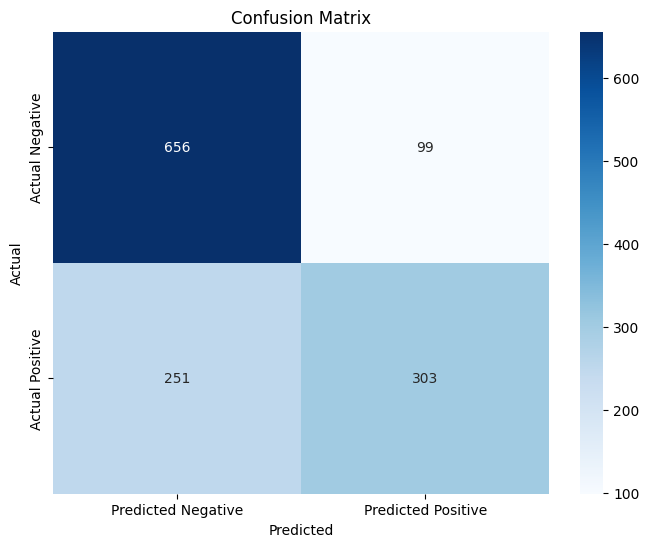

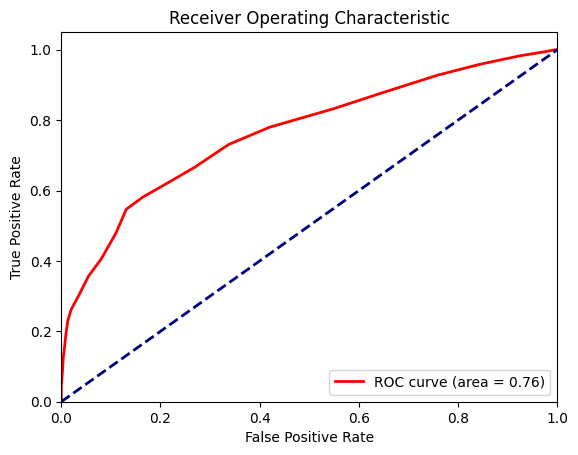

In [272]:

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

DECISION TREE WITHOUT FEATURE ENGINEERING

In [273]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import randint, uniform

# Custom transformer for genres
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language']
X = data[features + ['genres']]
y = data['Success']

# Preprocessing for numeric and categorical data
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity']
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('genres', Pipeline([('mlb', MultiLabelBinarizerTransformer())]), 'genres')
    ])

# Create a pipeline that includes preprocessing, feature selection, and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=20)),  # Reduce the number of features
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])

# Define hyperparameters for RandomizedSearchCV
param_distributions = {
    'classifier__max_depth': randint(1, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__criterion': ['gini', 'entropy']
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV with StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)
search.fit(X_train, y_train)

# Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba_dt = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

print(f'Best parameters: {search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'roc_auc: {roc_auc}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 19, 'classifier__min_samples_split': 3}
Accuracy: 0.6997708174178763
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       755
           1       0.69      0.54      0.60       554

    accuracy                           0.70      1309
   macro avg       0.70      0.68      0.68      1309
weighted avg       0.70      0.70      0.69      1309

Confusion Matrix:
[[618 137]
 [256 298]]
roc_auc: 0.7448765151696273


DECISION TREE WITH FEATURE ENGINEERING

In [274]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import randint, uniform

# Custom transformer for genres
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language', 'log_budget', 'budget_popularity_interaction']
X = data[features + ['genres']]
y = data['Success']

# Preprocessing for numeric and categorical data
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'budget_popularity_interaction', 'log_budget']
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('genres', Pipeline([('mlb', MultiLabelBinarizerTransformer())]), 'genres')
    ])

# Create a pipeline that includes preprocessing, feature selection, and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=20)),  # Reduce the number of features
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])

# Define hyperparameters for RandomizedSearchCV
param_distributions = {
    'classifier__max_depth': randint(1, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__criterion': ['gini', 'entropy']
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV with StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)
search.fit(X_train, y_train)

# Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba_dt = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

print(f'Best parameters: {search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'roc_auc: {roc_auc}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__min_samples_leaf': 15, 'classifier__min_samples_split': 4}
Accuracy: 0.706646294881589
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       755
           1       0.71      0.51      0.60       554

    accuracy                           0.71      1309
   macro avg       0.71      0.68      0.68      1309
weighted avg       0.71      0.71      0.70      1309

Confusion Matrix:
[[640 115]
 [269 285]]
roc_auc: 0.7511726874985057


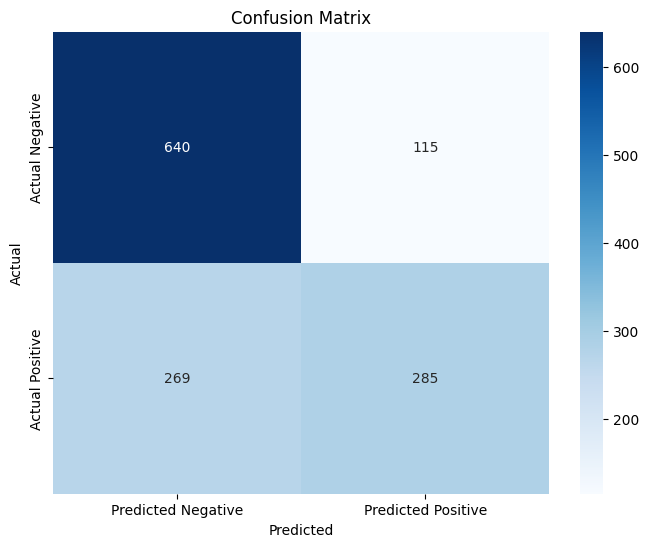

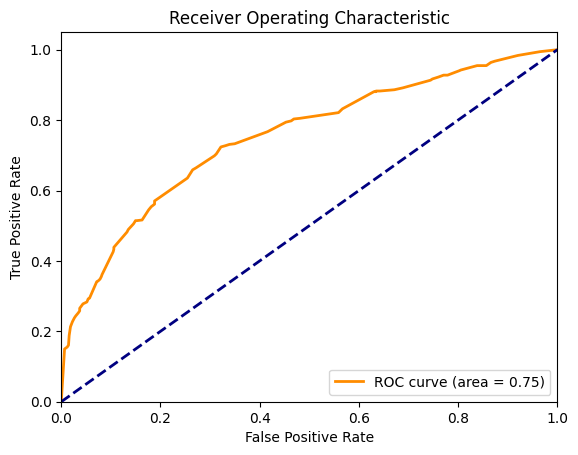

In [275]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

NEURAL NETWORK WITHOUT FEATURE ENGINEERING

In [276]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import randint, uniform

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language', 'genres']
X = data[features]
y = data['Success']

# Define numeric and categorical features
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity']
categorical_features = ['original_language']
mlb_features = ['genres']

# Apply MultiLabelBinarizer outside the pipeline
mlb = MultiLabelBinarizer()
genres_transformed = mlb.fit_transform(data['genres'])
genres_df = pd.DataFrame(genres_transformed, index=data.index, columns=mlb.classes_)

# Combine the transformed genres with the original data
X = X.drop(columns='genres').join(genres_df)

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

# Define the Neural Network model
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', mlp)])

# Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': uniform(0.0001, 0.05),
    'classifier__learning_rate': ['constant','adaptive'],
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model from random search
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_proba_mlp = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')

conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_mlp)

# Print evaluation metrics
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC: {roc_auc}')

Best Parameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.02552853455823514, 'classifier__hidden_layer_sizes': (50, 100, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'sgd'}
Accuracy: 0.7356760886172651
F1 Score: 0.6519114688128773
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       755
           1       0.74      0.58      0.65       554

    accuracy                           0.74      1309
   macro avg       0.74      0.72      0.72      1309
weighted avg       0.74      0.74      0.73      1309

Confusion Matrix:
[[639 116]
 [230 324]]
ROC-AUC: 0.7826858249456093


NEURAL NETWORK WITH FEATURE ENGINEERING

In [277]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import randint, uniform

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language', 'genres', 'budget_popularity_interaction', 'log_budget']
X = data[features]
y = data['Success']

# Define numeric and categorical features
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'log_budget', 'budget_popularity_interaction']
categorical_features = ['original_language']
mlb_features = ['genres']

# Apply MultiLabelBinarizer outside the pipeline
mlb = MultiLabelBinarizer()
genres_transformed = mlb.fit_transform(data['genres'])
genres_df = pd.DataFrame(genres_transformed, index=data.index, columns=mlb.classes_)

# Combine the transformed genres with the original data
X = X.drop(columns='genres').join(genres_df)

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

# Define the Neural Network model
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', mlp)])

# Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': uniform(0.0001, 0.05),
    'classifier__learning_rate': ['constant','adaptive'],
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model from random search
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_proba_mlp = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')

conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_mlp)

# Print evaluation metrics
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC: {roc_auc}')



Best Parameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.015143915490838484, 'classifier__hidden_layer_sizes': (50, 50, 50), 'classifier__learning_rate': 'adaptive', 'classifier__solver': 'sgd'}
Accuracy: 0.7364400305576776
F1 Score: 0.6877828054298643
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       755
           1       0.69      0.69      0.69       554

    accuracy                           0.74      1309
   macro avg       0.73      0.73      0.73      1309
weighted avg       0.74      0.74      0.74      1309

Confusion Matrix:
[[584 171]
 [174 380]]
ROC-AUC: 0.79806345183733


C:\Users\abhij\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


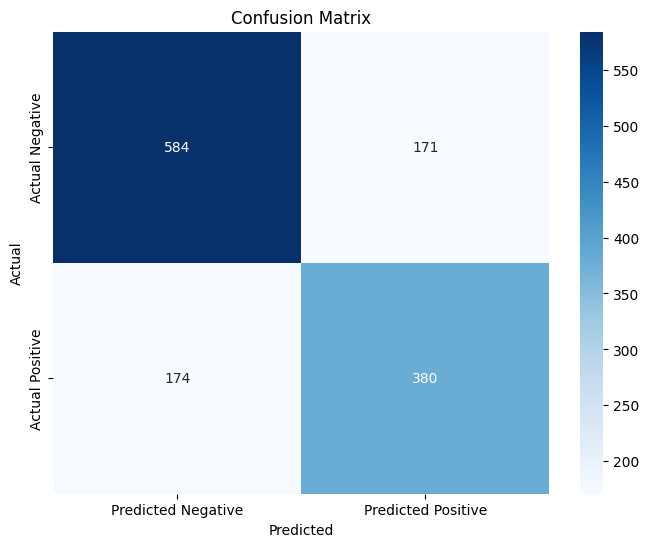

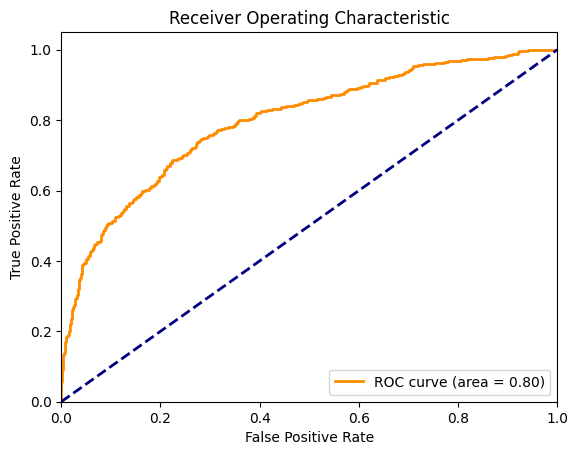

In [278]:

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

XGBOOST WITHOUT FEATURE ENGINEERING

In [279]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import loguniform

# Custom transformer for genres
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language']
X = data[features + ['genres']]
y = data['Success']

# Preprocessing for numeric and categorical data
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity']
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('genres', Pipeline([('mlb', MultiLabelBinarizerTransformer())]), 'genres')
    ])

# Create a pipeline that includes preprocessing, feature selection, and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=20)),  # Reduce the number of features
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))  # XGBoost classifier
])

# Define hyperparameters for RandomizedSearchCV
param_distributions = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(1, 20),
    'classifier__learning_rate': loguniform(0.01, 0.3),
    'classifier__subsample': loguniform(0.5, 1.0),
    'classifier__colsample_bytree': loguniform(0.5, 1.0),
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV with StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)
search.fit(X_train, y_train)

# Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f'Best parameters: {search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC: {roc_auc}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__colsample_bytree': 0.7601823211425269, 'classifier__learning_rate': 0.06272067883482679, 'classifier__max_depth': 4, 'classifier__n_estimators': 112, 'classifier__subsample': 0.5274038141498082}
Accuracy: 0.721161191749427
F1 score: 0.627170582226762
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       755
           1       0.72      0.55      0.63       554

    accuracy                           0.72      1309
   macro avg       0.72      0.70      0.70      1309
weighted avg       0.72      0.72      0.71      1309

Confusion Matrix:
[[637 118]
 [247 307]]
ROC-AUC: 0.7797535084992947


XGBOOST WITH FEATURE ENGINEERING

In [280]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import loguniform

# Custom transformer for genres
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Define features and target
features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'original_language', 'log_budget', 'budget_popularity_interaction']
X = data[features + ['genres']]
y = data['Success']

# Preprocessing for numeric and categorical data
numeric_features = ['vote_average', 'vote_count', 'budget', 'runtime', 'popularity', 'budget_popularity_interaction', 'log_budget']
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('genres', Pipeline([('mlb', MultiLabelBinarizerTransformer())]), 'genres')
    ])

# Create a pipeline that includes preprocessing, feature selection, and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=20)),  # Reduce the number of features
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))  # XGBoost classifier
])

# Define hyperparameters for RandomizedSearchCV
param_distributions = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(1, 20),
    'classifier__learning_rate': loguniform(0.01, 0.3),
    'classifier__subsample': loguniform(0.5, 1.0),
    'classifier__colsample_bytree': loguniform(0.5, 1.0),
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV with StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)
search.fit(X_train, y_train)

# Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba_xg = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_xg)
f1 = f1_score(y_test, y_pred)

print(f'Best parameters: {search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC: {roc_auc}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__colsample_bytree': 0.7772283396888164, 'classifier__learning_rate': 0.029130095015495922, 'classifier__max_depth': 4, 'classifier__n_estimators': 321, 'classifier__subsample': 0.5506973053976273}
Accuracy: 0.7226890756302521
F1 score: 0.6253869969040248
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       755
           1       0.73      0.55      0.63       554

    accuracy                           0.72      1309
   macro avg       0.72      0.70      0.70      1309
weighted avg       0.72      0.72      0.71      1309

Confusion Matrix:
[[643 112]
 [251 303]]
ROC-AUC: 0.7845506491022545


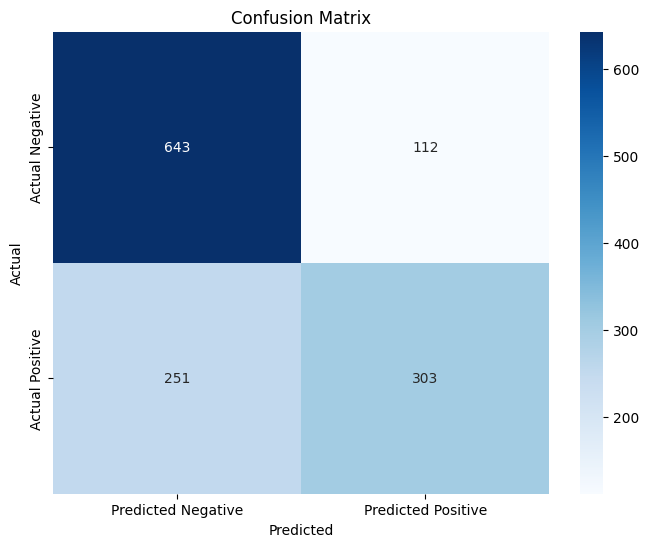

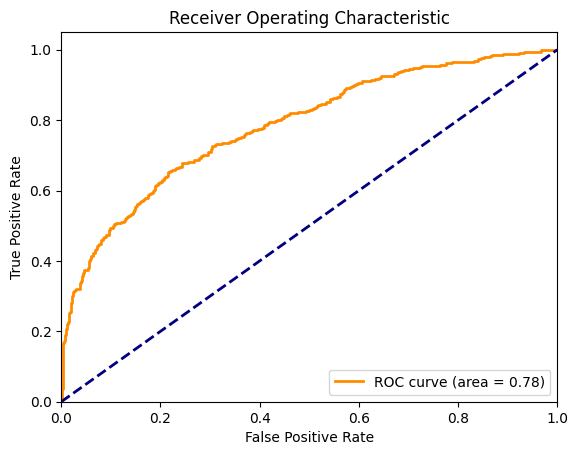

In [281]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_proba_xg)
plt.figure()
plt.plot(fpr_xg, tpr_xg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

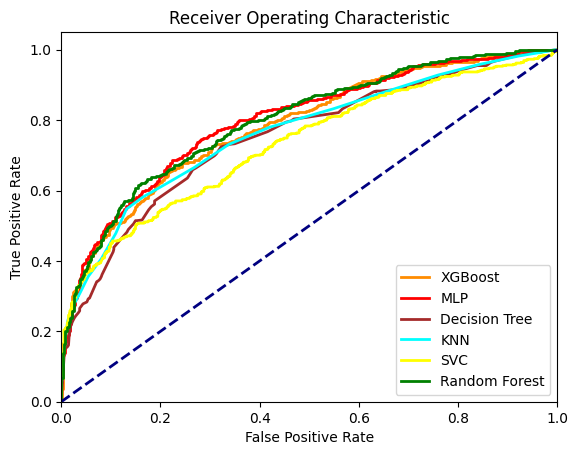

In [287]:
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_proba_xg)
plt.figure()
plt.plot(fpr_xg, tpr_xg, color='darkorange', lw=2, label=f'XGBoost')
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label=f'MLP')
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label=f'Decision Tree')
plt.plot(fpr_knn, tpr_knn, color='cyan', lw=2, label=f'KNN')
plt.plot(fpr_svm, tpr_svm, color='yellow', lw=2, label=f'SVC')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()